## Q1 Unbiased Estimator of Variance

Let  $X_1, X_2, ..., X_n $ be i.i.d. random variables with common mean $\mu$ and variance $\sigma^2 $. Define the sample mean as:

$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$

Show that the statistic $S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2$ is an **unbiased estimator** of $\sigma^2 $; that is, $\mathbb{E}[S^2] = \sigma^2$

**Hint:** Define $ R_i = X_i - \bar{X} $, and show that $\mathrm{Var}(R_i) = \frac{n - 1}{n} \sigma^2$

### Solution:

We know that,

$\mathrm{Var}(R_i) = \mathrm{Var}(X_i - \bar{X})$
$= \mathrm{Var}(X_i) + \mathrm{Var}(\bar{X}) - 2\times\mathrm{Cov}(X_i, \bar{X})$

Also,

$\mathrm{Cov}(X_i, \bar{X}) = \mathrm{Cov}(X_i, \frac{1}{n} \sum_{j=1}^{n} X_j)$
$=\frac{1}{n} \sum_{j=1}^{n} \mathrm{Cov}(X_i,X_j)$

As $X_i$ is independent of all $X_j$; then for $j\neq i \text{ } \mathrm{Cov}(X_i, X_j) = 0$, and for $ j = i \text{ } \mathrm{Cov}(X_i, X_i) = \mathrm{Var}(X_i) = \sigma^2$
<br>
Therefore,

$\mathrm{Cov}(X_i, \bar{X}) = \frac{1}{n} \times (0 + \sigma^2) = \frac{\sigma^2}{n}$ 
  
Hence,

$\mathrm{Var}(R_i) = \mathrm{Var}(X_i) + \mathrm{Var}(\bar{X}) - 2\times\frac{\sigma^2}{n}$

$\mathrm{Var}(R_i) = \sigma^2 + \frac{\sigma^2}{n} - \frac{2\sigma^2}{n}$

$\mathrm{Var}(R_i) = \frac{n-1}{n}\sigma^2$

Using summation on both sides

$\sum_{i=1}^{n} \mathrm{Var}(R_i) = \sum_{i=1}^{n} \frac{n-1}{n}\sigma^2 = (n-1)\sigma^2$ ...eqn 1


Now,

$\mathrm{Var}(R_i) = \mathbb{E}(R_i^2) - (\mathbb{E}(R_i))^2$

But we know that $\mathbb{E}(R_i) = 0$, therefore,

$\mathrm{Var}(R_i) = \mathbb{E}((X_i - \bar{X})^2)$

Now using summation on both sides

$\sum_{i=1}^{n} \mathrm{Var}(R_i) = \sum_{i=1}^{n} \mathbb{E}((X_i - \bar{X})^2) = \mathbb{E}(\sum_{i=1}^{n} (X_i - \bar{X})^2)$ ...eqn 2


Using eqn 1 and eqn 2

$\mathbb{E} (\sum_{i=1}^{n} (X_i - \bar{X})^2) = (n-1)\sigma^2$


From given $S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2$, therefore

$\mathbb{E}(S^2) = \frac{1}{n-1} \mathbb{E} (\sum_{i=1}^{n} (X_i - \bar{X})^2) = \frac{1}{n-1} (n-1)\sigma^2$

Therefore, $\mathbb{E}(S^2) = \sigma^2$ 

Hence proved that the sample variance is an unbiased estimator of $\sigma^2$.

## Q2

In [72]:
confBand <- function(x, y, conf = 0.95) {
  data <- data.frame(x = x, y = y)
  model <- lm(y ~ x, data = data)
  pred <- predict(model, interval = "confidence", level = conf)

  plot(x, y, pch = 16, col = "gray60", xlab = "x", ylab = "y", main = "Best Fit Line, Pointwise and Simultaneous Confidence Band")

  polygon(c(x, rev(x)), c(pred[, "lwr"], rev(pred[, "upr"])), col = rgb(0.1, 0.1, 1, 0.2), border = NA)

  lines(x, pred[, "fit"], col = "blue", lwd = 2)

  arrows(x0 = x, y0 = pred[, "lwr"], x1 = x, y1 = pred[, "upr"], angle = 90, code = 3, length = 0.05, col = rgb(0, 0, 0, 0.2))

  legend("topright", legend = c("Best Fit Line", "Simultaneous Confidence Band", "Fixed Point Confidence Band"),
  col = c("blue", rgb(0.1, 0.1, 1, 0.2), rgb(0, 0, 0, 0.2)),
  lwd = c(2, NA, 1), pch = c(NA, 15, NA), pt.cex = c(NA, 2, NA),
  lty = c(1, NA, 1), bty = "n")
}

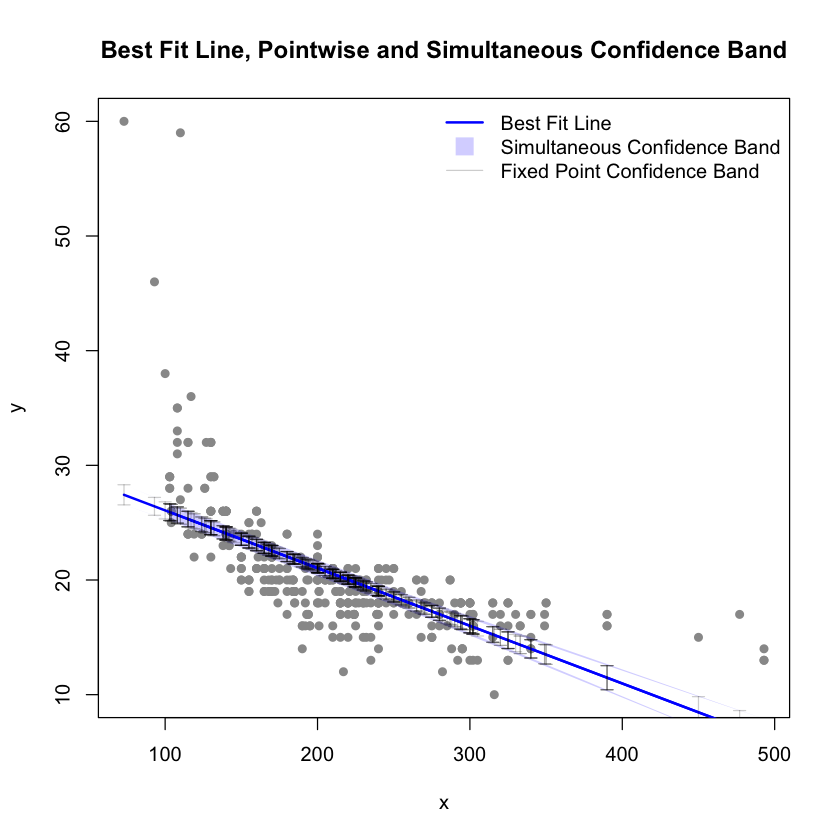

In [74]:
load(file='04cars.rda')
dat <- na.omit(dat)
confBand(dat[,"Horsepower"],dat[,"City_MPG"])

The dark blue line is the least squares line. The Light blue lines are the boundaries of the Simultaneous Confidence Band. The Fixed Point Confidence Band is represented as vertical Confidence Intervals for every value of x. Upong visual inspection, we note that a linear model is not a good fit for this data. If the data were really linear, then the simultaneous confidence band has a 95% probability of containing the true parameters (coefficient and intercept), and for any given X, the fixed point confidence band has a 95% probability of containing the true parameters.

## Q3

In [6]:
set.seed(42)

# Parameters
n <- 100
N <- 1000
alpha <- 0.05
sigma2 <- 0.2
beta <- c(3, 0.5)

# Fixed design
x <- sort(runif(n))
X <- cbind(1, x)  # design matrix
p <- ncol(X)

# Containers for results
pointwise_hits <- 0
simultaneous_hits <- 0

for (i in 1:N) {
    
  epsilon <- rnorm(n, mean = 0, sd = sqrt(sigma2))
  y <- X %*% beta + epsilon

  # Fitting linear model
  fit <- lm(y ~ x)
  beta_hat <- coef(fit)
  y_hat <- X %*% beta_hat

  # Estimating sigma^2
  sigma_hat <- summary(fit)$sigma

  # Compute (X^T X)^-1
  XtX_inv <- solve(t(X) %*% X)

  # Standard error of x^T beta_hat at each x
  SE_vec <- sqrt(rowSums((X %*% XtX_inv) * X)) * sigma_hat

  # Pointwise t-quantile
  t_pointwise <- qt(1 - alpha / 2, df = n - p)

  # Pointwise CI
  lower_pw <- y_hat - t_pointwise * SE_vec
  upper_pw <- y_hat + t_pointwise * SE_vec

  # Check if true values are inside pointwise band
  mu_true <- X %*% beta
  pointwise_hits <- pointwise_hits + all(mu_true >= lower_pw & mu_true <= upper_pw)

  t_simul <- qt(1 - alpha / (2 * n), df = n - p)

  lower_sim <- y_hat - t_simul * SE_vec
  upper_sim <- y_hat + t_simul * SE_vec

  # Check if true line is inside simultaneous band
  simultaneous_hits <- simultaneous_hits + all(mu_true >= lower_sim & mu_true <= upper_sim)
}

cat("Pointwise band covered true line in", pointwise_hits / N, "of runs\n")
cat("Simultaneous band covered true line in", simultaneous_hits / N, "of runs\n")


Pointwise band covered true line in 0.867 of runs
Simultaneous band covered true line in 1 of runs


The pointwise bands, while having nominal 95% coverage at individual x-values, only covered the entire true regression line in 86.7% of the simulations. This is expected because pointwise intervals do not adjust for the multiple comparisons across all x-values. On the other hand, the simultaneous confidence bands, which are wider and account for the entire range of x-values, successfully covered the true line in 100% of the simulations.